# Modelo supervisado regresión Lineal

Platzi - Curso de Fundamentos Prácticos de Machine Learning

Por: David Alonso Rueda Rodríguez - daruedar@correo.udistrital.edu.co

Tema: Modelo supervisado regresión Logistica.

## Objetivo de la actividad:

Aplicar el modelo supervisado regresión logistica a 2 grupos de datos

## Temas trabajados

A continuación, listado de actividades trabajadas:
    
### Situación Problémica 01

    1. Describir el problema
    2. Describir los datos cargados utilizados
    3. Aplicar algoritmo
    4. Analizar
  
#### Fuente de repositorio de datos:

Los datos hacen parte del conjunto de datos: [Datos Fuente](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

[Datos suministrados en el curso](../src/diabetes.csv)

#### Librerías requeridas:

[Pandas](https://pandas.pydata.org/) - [Matplotlib](https://matplotlib.org/) - [Scikit-learn](https://scikit-learn.org/stable/)

#### Listado de versiones

- 000 Revisión de datos y evaluación del modelo
-  01 Carga de datos, entrenamiento y evaluación de modelo de regresión logística


## 1. Describir el problema

Se desea predecir el salario de un programador utilizando como variable independiente la experiencia de la persona.

## 2. Describir los datos cargados utilizados

In [2]:
import pandas as pd
import seaborn as sns
datos = pd.read_csv("../src/diabetes.csv")
datos.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print("- Cantidad de muestras:{0} \n- Cantidad de características:{1}" .format(datos.shape[0], datos.shape[1]))

- Cantidad de muestras:768 
- Cantidad de características:9


Los datos suministrados tienen un total de 768 ejemplos y 9 características que describen:

- Pregnancies = Meses de Embarazo de la persona
- Glucose = Nivel de glucosa de la persona
- BloodPressure = Presión sanguinea
- SkinThickness = ?
- Insulin = Cantidad de insulina en la sangre?
- BMI = ?
- DiabetesPedigreeFunction = ?
- Age = Edad de la persona

#### Descripción de los datos cargados

In [4]:
datos.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
datos.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


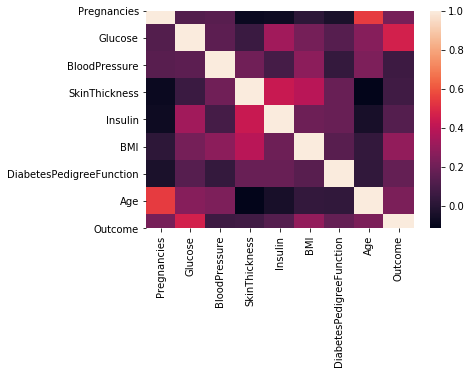

In [6]:
sns.heatmap(datos.corr())

## 2. Aplicar algoritmo

In [7]:
# Importar librerías de Scikit Learn para aplicar machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt


### 2.1 Separación de datos para entrenamiento

In [8]:
print(datos.columns)
listado_columnas_entrenamiento = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [9]:
# Se envia el 70% de los datos para realizar el entrenamiento del modelo
x = datos[listado_columnas_entrenamiento]
y = datos['Outcome']
X_train, X_test, Y_train, Y_test = train_test_split (x, y, test_size = 0.3, random_state=0)

### 2.2 Entrenamiento de modelos

In [10]:
# Inicialización de los modelos
modelo_regLogaritmica = LogisticRegression()

In [11]:
# Entrenamiento del modelo con llamado de variables iniciales
modelo_regLogaritmica.fit(X_train, Y_train)

/home/david/anaconda3/envs/cd/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## 2.3 Visualización de Resultados

## 2.4. Evaluación del modelo

In [12]:
modelo_regLogaritmica.score(X_test, Y_test)

0.7835497835497836

In [1]:
import numpy as np

In [8]:
help(np.sort(np.arange(5
                      )))

Help on ndarray object:

class ndarray(builtins.object)
 |  ndarray(shape, dtype=float, buffer=None, offset=0,
 |          strides=None, order=None)
 |  
 |  An array object represents a multidimensional, homogeneous array
 |  of fixed-size items.  An associated data-type object describes the
 |  format of each element in the array (its byte-order, how many bytes it
 |  occupies in memory, whether it is an integer, a floating point number,
 |  or something else, etc.)
 |  
 |  Arrays should be constructed using `array`, `zeros` or `empty` (refer
 |  to the See Also section below).  The parameters given here refer to
 |  a low-level method (`ndarray(...)`) for instantiating an array.
 |  
 |  For more information, refer to the `numpy` module and examine the
 |  methods and attributes of an array.
 |  
 |  Parameters
 |  ----------
 |  (for the __new__ method; see Notes below)
 |  
 |  shape : tuple of ints
 |      Shape of created array.
 |  dtype : data-type, optional
 |      Any objec